In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,4
import seaborn as sns

# Task 1: Calculate the confidence intervals for men shoes sales in the USA, this time based on a bigger sample - 2015-2016.

In [2]:
df = pd.read_csv('Al Bundy.csv')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year_month'] = df['year'].astype(str)+df['month'].astype(str)
df = df[(df['Country'] == 'United States') & (df['Gender'] == 'Male')]
df = df[(df['year'] == 2015) | (df['year'] == 2016)]
df = df[['year_month','Gender','Country','Size (US)']]
df.head()

,year_month,Gender,Country,Size (US)
2753,20151,Male,United States,9.5
2754,20151,Male,United States,8.5
2755,20151,Male,United States,9.0
2766,20151,Male,United States,10.0
2767,20151,Male,United States,9.5


In [3]:
df_1516 = pd.pivot_table(df, values='Country', index='Size (US)',columns='year_month', aggfunc='count')
df_1516.fillna(0, inplace=True)
df_1516['Mean'] = df_1516.mean(axis=1)
df_1516['SD'] = df_1516.std(axis=1)
df_1516['Standard error'] = df_1516['SD']/np.sqrt(24)
df_1516 = df_1516[['Mean','SD','Standard error']]
df_1516.head()

year_month,Mean,SD,Standard error
Size (US),,,
6.0,2.166667,1.885618,0.384900
6.5,1.583333,1.630865,0.332899
7.0,1.333333,1.624466,0.331593
7.5,2.333333,1.972027,0.402538
8.0,4.791667,2.871979,0.586240


In [4]:
t = stats.t.ppf(1-0.025, 23)
df_1516['Margin of error'] = df_1516['Standard error']*t
df_1516['Lower Bound'] = df_1516['Mean'] - df_1516['Margin of error']
df_1516['Upper Bound'] = df_1516['Mean'] + df_1516['Margin of error']
df_1516

year_month,Mean,SD,Standard error,Margin of error,Lower Bound,Upper Bound
Size (US),,,,,,
6.0,2.166667,1.885618,0.384900,0.796227,1.370440,2.962893
6.5,1.583333,1.630865,0.332899,0.688654,0.894679,2.271987
7.0,1.333333,1.624466,0.331593,0.685952,0.647382,2.019285
7.5,2.333333,1.972027,0.402538,0.832714,1.500620,3.166047
8.0,4.791667,2.871979,0.586240,1.212730,3.578936,6.004397
8.5,7.875000,4.530567,0.924798,1.913091,5.961909,9.788091
9.0,16.333333,6.053007,1.235565,2.555961,13.777373,18.889294
9.5,25.583333,8.470127,1.728957,3.576621,22.006712,29.159954
10.0,18.791667,6.357274,1.297673,2.684441,16.107225,21.476108


<BarContainer object of 16 artists>

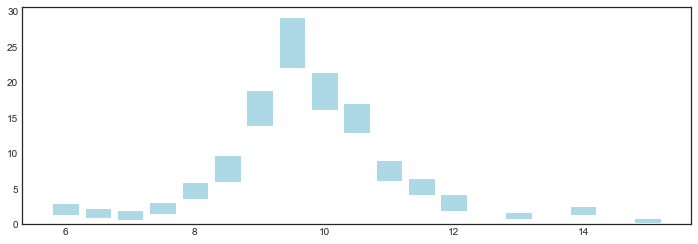

In [5]:
plt.bar(df_1516.index,df_1516['Upper Bound'],width=0.41, color='lightblue',edgecolor='white')
plt.bar(df_1516.index,df_1516['Lower Bound'],width=0.41, color='white')

# Task 2: Find if there is pay gap based on race. There is no pay gap based on race. The result is insignificant.

In [6]:
df = pd.read_csv('Spark Fortress Inc.csv')
df.head()

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Sweetwater,Alex,51,Male,United States,White,40770,Software Engineering,Software Engineering Manager,56160.0
1,Carabbio,Judith,30,Female,United States,White,41589,Software Engineering,Software Engineer,116480.0
2,Saada,Adell,31,Female,United States,White,41218,Software Engineering,Software Engineer,102440.0
3,Szabo,Andrew,34,Male,United States,White,41827,Software Engineering,Software Engineer,99840.0
4,Andreola,Colby,38,Female,United States,White,41953,Software Engineering,Software Engineer,99008.0


In [7]:
white = df[df['Ethnicity'] == 'White']
white = white['Salary']
white_count = white.count()
white_mean = white.mean()
white_var = white.var()
print("count = ",white_count)
print("mean = ",white_mean)
print("var = ",white_var)

count =  112
mean =  67323.1
var =  1136728018.0252259


In [8]:
black = df[df['Ethnicity'] != 'White']
black = black['Salary']
black_count = black.count()
black_mean = black.mean()
black_var = black.var()
print("count = ",black_count)
print("mean = ",black_mean)
print("var = ",black_var)

count =  62
mean =  70917.26451612904
var =  1225049916.2974088


In [9]:
t = (black_mean - white_mean)/np.sqrt((white_var/white_count) + (black_var/black_count))
print("t-score = ",t)

t-score =  0.6572076630862012


In [10]:
p = 1 - stats.t.cdf(t,df=(111+61))
print("p-value = ", 2*p)

p-value =  0.5119258627156795
